In [38]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import numpy as np

In [39]:
db_config={
    'host':'localhost',
    'user':'root',
    'password':'Avenger$A$$emb1e',
    'database':'sales'
}

In [40]:
"Task 1:..."

queries={
   """Question 1: Top 5 Products by Sales in 2022 for the Mobiles & Tablets Category Scenario:
 The Marketing Team is preparing for a Year-End Festival and needs to identify the top 5 products in the Mobiles & Tablets category that had the highest sales quantities in 2022.
 The products should be filtered to ensure only valid orders are included.
 Requirements: • Filter the data to include only products from the Mobiles & Tablets category in 2022, where the is_valid feature is set to 1.
 • Group the data by sku_name and category, and sum the qty_ordered for each product. 
 • Rank the products based on their total sales quantity in descending order.
 • Display the top 5 products with the highest sales quantities. 
 • Generate a horizontal bar chart showing the top 5 products by quantity. 
 Key Features to Use: • category • order_date (for filtering by year) • is_valid (to filter valid orders) • sku_name (for product names) • qty_ordered (for sales quantities) """
    :
"""
/* Answer: assuming that the part till ranking in descending order is to be done in SQL and the Top 5 product part is to be done in Python along with the bar chart
i am doing the SQL analysis for the part before displaying the products with highest sales quantities*/
SELECT 
    s.sku_name, 
    s.category, 
    SUM(o.qty_ordered) AS total_sales_qty
FROM 
    order_detail o
INNER JOIN 
    sku_detail s ON o.sku_id = s.id
WHERE 
    s.category LIKE 'Mobiles%'       -- Handles both 'Mobiles Tablets' and 'Mobiles & Tablets'
    AND YEAR(o.order_date) = 2022
    AND o.is_valid = 1
GROUP BY 
    s.sku_name, s.category
ORDER BY 
    total_sales_qty DESC
LIMIT 5;
"""
}

In [41]:
from IPython.display import display

In [42]:
try:
    connection= pymysql.connect(**db_config)
    print('connection has been established with database successfully')

    for question,query in queries.items():
        print(f'\n ---{question}---')
        df = pd.read_sql(query,connection)
        display(df)

except Exception as e:
    print('An error occured')

finally:
    if connection:
        connection.close()
        print("Connection closed")

connection has been established with database successfully

 ---Question 1: Top 5 Products by Sales in 2022 for the Mobiles & Tablets Category Scenario:
 The Marketing Team is preparing for a Year-End Festival and needs to identify the top 5 products in the Mobiles & Tablets category that had the highest sales quantities in 2022.
 The products should be filtered to ensure only valid orders are included.
 Requirements: • Filter the data to include only products from the Mobiles & Tablets category in 2022, where the is_valid feature is set to 1.
 • Group the data by sku_name and category, and sum the qty_ordered for each product. 
 • Rank the products based on their total sales quantity in descending order.
 • Display the top 5 products with the highest sales quantities. 
 • Generate a horizontal bar chart showing the top 5 products by quantity. 
 Key Features to Use: • category • order_date (for filtering by year) • is_valid (to filter valid orders) • sku_name (for product names) • qty_

C:\Users\joshi\AppData\Local\Temp\ipykernel_11848\1372292836.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,connection)


,sku_name,category,total_sales_qty
0,IDROID_BALRX7-Gold,Mobiles & Tablets,1000.0
1,IDROID_BALRX7-Jet black,Mobiles & Tablets,31.0
2,Infinix Hot 4-Gold,Mobiles & Tablets,15.0
3,samsung_Grand Prime Plus-Black,Mobiles & Tablets,11.0
4,samsung_Grand Prime Plus-Silver,Mobiles & Tablets,10.0


Connection closed


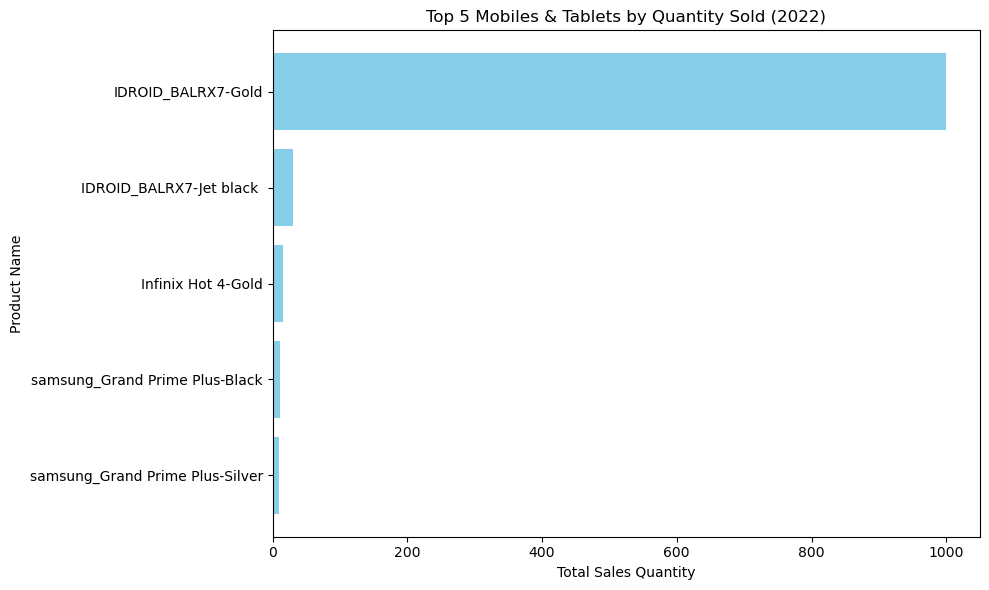

In [43]:

plt.figure(figsize=(10, 6))
plt.barh(df['sku_name'], df['total_sales_qty'], color='skyblue')
plt.xlabel('Total Sales Quantity')
plt.ylabel('Product Name')
plt.title('Top 5 Mobiles & Tablets by Quantity Sold (2022)')
plt.gca().invert_yaxis()  # Highest sales at top
plt.tight_layout()
plt.show()


In [44]:
"Task 2 :..."
df1=pd.read_csv("C:/Users/joshi/Downloads/archive/results_totaltransactions_2021.csv")

df2=pd.read_csv("C:/Users/joshi/Downloads/archive/results_totaltransactions_2022.csv")

df1.describe()

,qty_2021
count,85.000000
mean,4.964706
std,21.822033
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,200.000000


In [45]:
df2.describe()

,qty_2022
count,96.000000
mean,2.645833
std,5.675393
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,40.000000


In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sku_name  85 non-null     object
 1   qty_2021  85 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sku_name  96 non-null     object
 1   qty_2022  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [48]:
df1.isna().sum()

sku_name    0
qty_2021    0
dtype: int64

In [49]:
df2.isna().sum()

sku_name    0
qty_2022    0
dtype: int64

In [50]:
df=pd.merge(df1,df2, on='sku_name',how='outer')
print(df)

                             sku_name  qty_2021  qty_2022
0              AL Khair_Baby Oil 50ml       NaN       1.0
1       Aladdin_Wrench_Snap N Grip_01       1.0       NaN
2                  Aladdin_bike_cover       3.0       2.0
3                Alerashine_sku-09-XL       NaN       1.0
4                    Am-PTV_ATS-004-M       5.0       NaN
..                                ...       ...       ...
157             stripyinterior_100006       1.0       NaN
158  sukoonbundle-sukoon10-cj_CJPOISL       NaN       1.0
159                   test-product-00       NaN       1.0
160                  tucano_IPD7AN-BK       1.0       NaN
161                       vitamin_265       1.0       2.0

[162 rows x 3 columns]


In [51]:
df.isna()

,sku_name,qty_2021,qty_2022
0,False,True,False
1,False,False,True
2,False,False,False
3,False,True,False
4,False,False,True
...,...,...,...
157,False,False,True
158,False,True,False
159,False,True,False
160,False,False,True


In [52]:
df.isna().sum()

sku_name     0
qty_2021    77
qty_2022    66
dtype: int64

In [53]:
#  as there are plenty of missing values after the merging of the dataset,
# i am filling Nan values with 0
#this will make it easier to understand and calculate the decrease in sales for products in others category

df=df.fillna(0)

In [54]:
df['sales_diff'] = df['qty_2022'] - df['qty_2021']
df['percent_change']= np.where(
    df['qty_2021'] != 0,
    (df['sales_diff']/df['qty_2021'])*100,
    0
)

df

,sku_name,qty_2021,qty_2022,sales_diff,percent_change
0,AL Khair_Baby Oil 50ml,0.0,1.0,1.0,0.000000
1,Aladdin_Wrench_Snap N Grip_01,1.0,0.0,-1.0,-100.000000
2,Aladdin_bike_cover,3.0,2.0,-1.0,-33.333333
3,Alerashine_sku-09-XL,0.0,1.0,1.0,0.000000
4,Am-PTV_ATS-004-M,5.0,0.0,-5.0,-100.000000
...,...,...,...,...,...
157,stripyinterior_100006,1.0,0.0,-1.0,-100.000000
158,sukoonbundle-sukoon10-cj_CJPOISL,0.0,1.0,1.0,0.000000
159,test-product-00,0.0,1.0,1.0,0.000000
160,tucano_IPD7AN-BK,1.0,0.0,-1.0,-100.000000


In [55]:
def classify_change(row):
    if row['percent_change'] < -20:
        return 'DOWN'
    elif row['percent_change'] > 20:
        return 'UP'
    else:
        return 'FAIR'

df['change_status'] = df.apply(classify_change, axis=1)
df=df.sort_values('sales_diff').head(20)
df

,sku_name,qty_2021,qty_2022,sales_diff,percent_change,change_status
66,RB_Dettol Germ Busting Kit-bf,200.0,40.0,-160.0,-80.000000,DOWN
18,Dawlance_MD 10 + DWB 600,23.0,0.0,-23.0,-100.000000,DOWN
80,Telemall_MM-DR-HB-L,23.0,2.0,-21.0,-91.304348,DOWN
133,iu_Tickets General Enclosure-Islamabad,20.0,0.0,-20.0,-100.000000,DOWN
67,RS_Rehmat-e-Shereen Mix Mithai,13.0,0.0,-13.0,-100.000000,DOWN
137,kansai_NeverWet,10.0,1.0,-9.0,-90.000000,DOWN
150,sindbad_Sindbad Gift Card-3,7.0,0.0,-7.0,-100.000000,DOWN
129,emart_00-1,7.0,1.0,-6.0,-85.714286,DOWN
89,Vouch 365 2016,5.0,0.0,-5.0,-100.000000,DOWN
4,Am-PTV_ATS-004-M,5.0,0.0,-5.0,-100.000000,DOWN


In [56]:
df.to_csv('top_20_sales_decrease.csv',index=False)

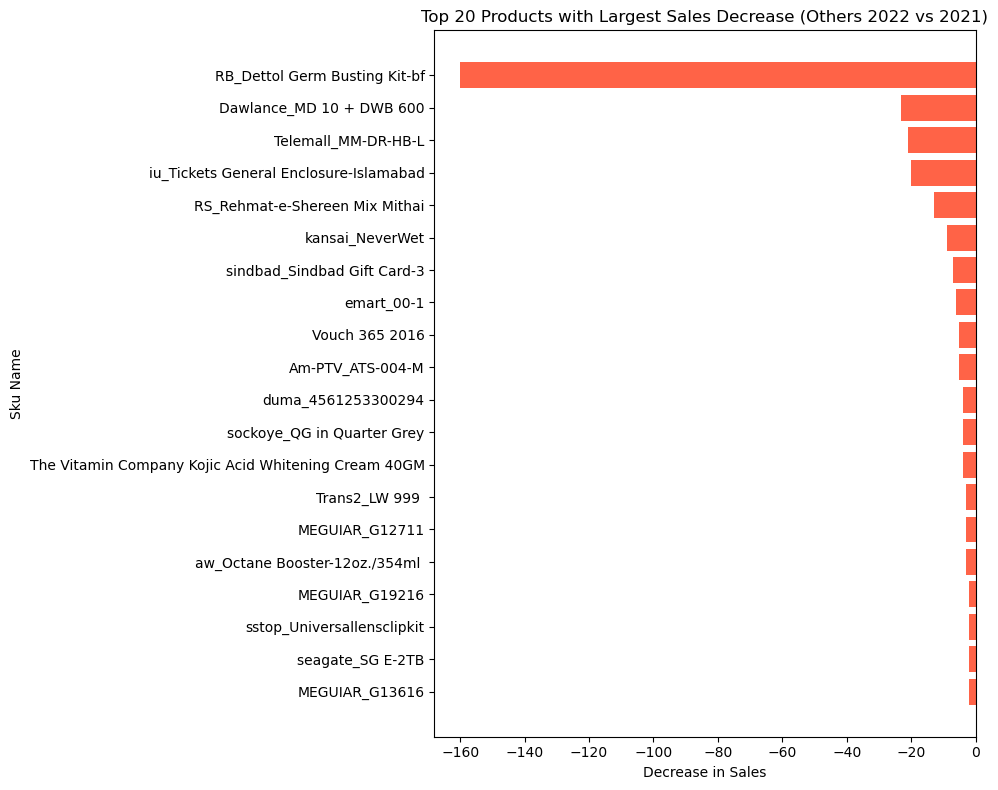

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.barh(df['sku_name'], df['sales_diff'], color='tomato')
plt.xlabel('Decrease in Sales')
plt.ylabel('Sku Name')
plt.title('Top 20 Products with Largest Sales Decrease (Others 2022 vs 2021)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [58]:
# Task 4: ...
new_df=pd.read_csv("C:/Users/joshi/Downloads/archive/Q4WeekdaayandWeekendSales.csv")
new_df.head()

,sales_date,month_id,day_name,month_name,day_type,total_sales
0,2022-10-01,10,Saturday,October,Weekend,16387842
1,2022-10-02,10,Sunday,October,Weekend,10764626
2,2022-10-03,10,Monday,October,Weekday,11676038
3,2022-10-04,10,Tuesday,October,Weekday,20873794
4,2022-10-05,10,Wednesday,October,Weekday,15150528


In [59]:

avg_by_month=new_df.groupby(['month_name','day_type'])['total_sales'].mean().reset_index()
print("Average daily sales by month and day type:")
print(avg_by_month)


Average daily sales by month and day type:
  month_name day_type   total_sales
0   December  Weekday  1.348529e+07
1   December  Weekend  1.462441e+07
2   November  Weekday  1.888973e+07
3   November  Weekend  1.517013e+07
4    October  Weekday  1.609403e+07
5    October  Weekend  1.462437e+07


In [60]:
Q4_avg=new_df.groupby('day_type')['total_sales'].mean().reset_index()
print("\nOverall Q4 averages:")
print(Q4_avg)


Overall Q4 averages:
  day_type   total_sales
0  Weekday  1.616001e+07
1  Weekend  1.478031e+07


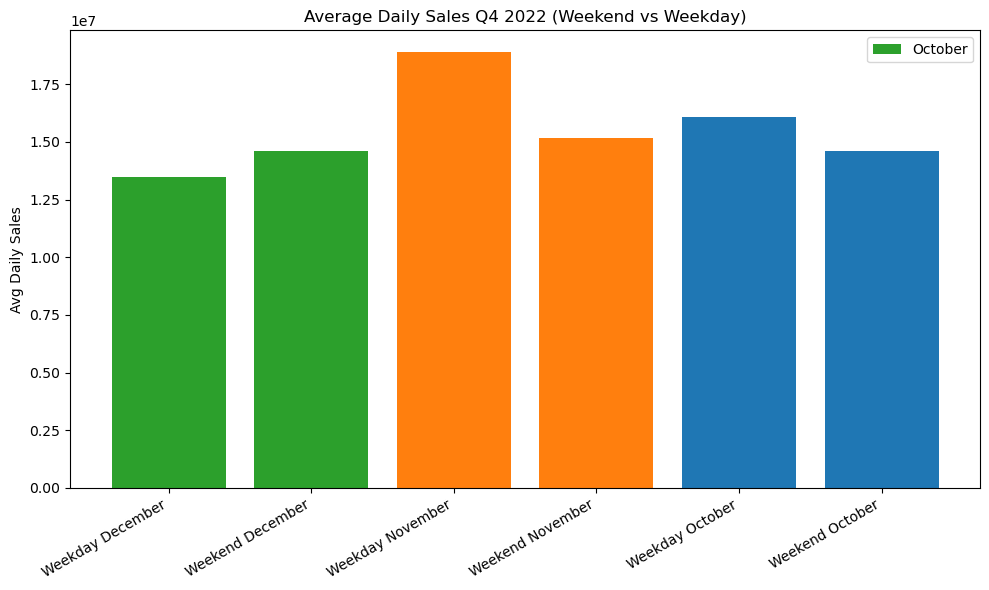

In [61]:
avg_by_month['label'] = avg_by_month['day_type'] + ' ' + avg_by_month['month_name']

plt.figure(figsize=(10, 6))
plt.bar(avg_by_month['label'], avg_by_month['total_sales'],
        color=[{'October':'#1f77b4','November':'#ff7f0e','December':'#2ca02c'}[m] for m in avg_by_month['month_name']])

plt.ylabel('Avg Daily Sales')
plt.title('Average Daily Sales Q4 2022 (Weekend vs Weekday)')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.legend(['October', 'November', 'December'])
plt.show()


In [62]:
# Task 5:
df21=pd.read_csv("C:/Users/joshi/Downloads/archive/dataset_2021.csv")
df22=pd.read_csv("C:/Users/joshi/Downloads/archive/dataset_2022.csv")

df21.head()

,sku_name,qty_ordered_2021
0,tcl_ 24 inch D2720 HD Ready LED TV,1
1,phub_Hope by Rasasi 75ml EDP,1
2,Progressive_9781474813860,1
3,Aladdin_Wrench_Snap N Grip_01,1
4,vitamin_Vita Growth,2


In [63]:
df22.head()

,sku_name,qty_ordered_2022
0,emart_Magic Hose Pipe 75 Ft,1
1,sheraton_FMOTORS_01,3
2,nutrifactor_NF002,4
3,Ifitness_T300,2
4,emart_0-64,3


In [64]:
df21.isna().sum()

sku_name            0
qty_ordered_2021    0
dtype: int64

In [65]:
df22.isna().sum()

sku_name            0
qty_ordered_2022    0
dtype: int64

In [66]:
fresh_df=pd.merge(df21,df22,on='sku_name',how='outer')

fresh_df

,sku_name,qty_ordered_2021,qty_ordered_2022
0,Huawei Mate 8,2.0,NaN
1,4U_Service-KA 008,NaN,1.0
2,A4-Tech_Keyboard-Mouse-Wireless-3100N,NaN,1.0
3,ABT_B175,NaN,3.0
4,AJ-bedsheet_AJB-003,NaN,1.0
...,...,...,...
1876,zubairco_003569,2.0,NaN
1877,zubairco_003577,1.0,NaN
1878,zubairco_37455_scissor,1.0,NaN
1879,zubairco_Schneider Xpress Pointersschneider xp...,1.0,NaN


In [67]:
fresh_df=fresh_df.fillna(0)
fresh_df

,sku_name,qty_ordered_2021,qty_ordered_2022
0,Huawei Mate 8,2.0,0.0
1,4U_Service-KA 008,0.0,1.0
2,A4-Tech_Keyboard-Mouse-Wireless-3100N,0.0,1.0
3,ABT_B175,0.0,3.0
4,AJ-bedsheet_AJB-003,0.0,1.0
...,...,...,...
1876,zubairco_003569,2.0,0.0
1877,zubairco_003577,1.0,0.0
1878,zubairco_37455_scissor,1.0,0.0
1879,zubairco_Schneider Xpress Pointersschneider xp...,1.0,0.0


In [68]:
fresh_df['diff_sales']=fresh_df['qty_ordered_2022']-fresh_df['qty_ordered_2021']
fresh_df

,sku_name,qty_ordered_2021,qty_ordered_2022,diff_sales
0,Huawei Mate 8,2.0,0.0,-2.0
1,4U_Service-KA 008,0.0,1.0,1.0
2,A4-Tech_Keyboard-Mouse-Wireless-3100N,0.0,1.0,1.0
3,ABT_B175,0.0,3.0,3.0
4,AJ-bedsheet_AJB-003,0.0,1.0,1.0
...,...,...,...,...
1876,zubairco_003569,2.0,0.0,-2.0
1877,zubairco_003577,1.0,0.0,-1.0
1878,zubairco_37455_scissor,1.0,0.0,-1.0
1879,zubairco_Schneider Xpress Pointersschneider xp...,1.0,0.0,-1.0


In [69]:
fresh_df=fresh_df.sort_values('diff_sales').head(10)
fresh_df

,sku_name,qty_ordered_2021,qty_ordered_2022,diff_sales
1740,shahi_buy one get one free Shahi Dal Moong,240.0,0.0,-240.0
861,RS_Plain Rusk,160.0,0.0,-160.0
836,RB_Household Bundle,133.0,0.0,-133.0
221,CK_BF530-Underwear-Pack of 3-XL,119.0,0.0,-119.0
1851,vitamin_TVC-BB Cream (Buy 2 Get Kojic Facewash...,99.0,0.0,-99.0
850,RS_Baklawa 500gm,107.0,18.0,-89.0
855,RS_Honey Dry Fruit Halwa,52.0,0.0,-52.0
1511,jn_900g,57.0,10.0,-47.0
864,RS_Soan Papri-250gm,51.0,7.0,-44.0
1690,samsungGALAXY S-7 EDGE 32GB LTE,41.0,0.0,-41.0


In [72]:
fresh_df.to_csv('largest_decrease_sales_periods.csv')

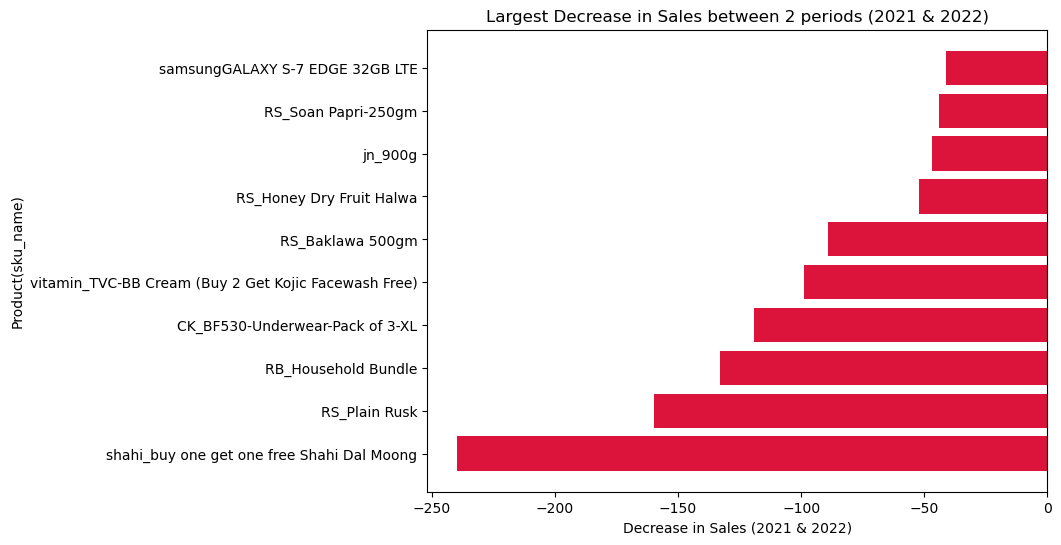

In [71]:
plt.figure(figsize=(8,6))
plt.barh(fresh_df['sku_name'],fresh_df['diff_sales'],color='crimson')
plt.xlabel('Decrease in Sales (2021 & 2022)')
plt.ylabel('Product(sku_name)')
plt.title('Largest Decrease in Sales between 2 periods (2021 & 2022)')
plt.show()

In [1]:
# Task 6 to be done in Google Looker Studio, Task 3 is done in SQL and Google Looker Studio